In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2023-11-29 21:27:26.784728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 21:27:26.955576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 21:27:26.955628: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-29 21:27:27.935236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# Import Kera:TimeSeriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import Keras:MinMax Scalar

from sklearn.preprocessing import MinMaxScaler

In [4]:
dir_path_dataset_1 = 'DATA/AAPL_STOCK_20140101_20190630.csv'

### Load Data

In [5]:
df_ALL = pd.read_csv(dir_path_dataset_1)
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030672,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908873,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [6]:
df_ALL.shape

(1382, 7)

In [7]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Statistic Summary

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,33.948871,34.247564,33.653907,33.959740,31.620611,1.670774e+08
std,9.725011,9.820676,9.635296,9.729731,9.854169,9.220445e+07
min,17.684999,17.911785,17.626785,17.849285,15.648320,4.590360e+07
25%,26.586875,26.826250,26.304375,26.501875,24.201258,1.045275e+08
50%,31.481250,31.712499,31.213750,31.458751,28.356693,1.423682e+08
75%,42.462499,42.804375,42.068751,42.324376,40.129999,2.034164e+08
max,57.695000,58.367500,57.445000,58.017502,55.492199,1.065523e+09


### Keep only close price and filter out all other attributes

In [9]:
df = df_ALL.iloc[:,4:5]

In [10]:
df.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


<AxesSubplot:>

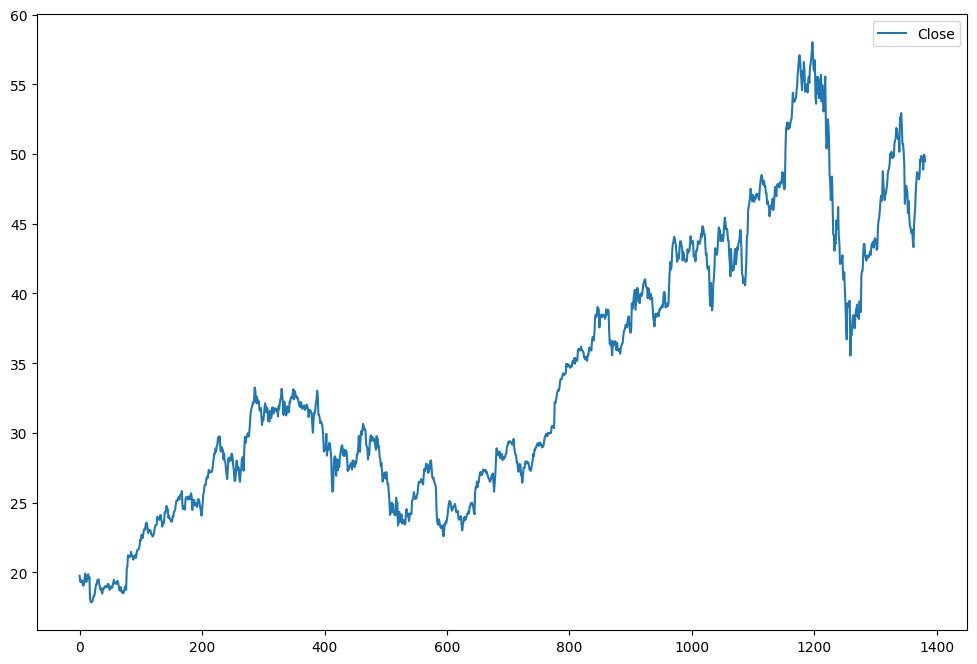

In [11]:
df.plot(figsize=(12,8))

### Length of input Time Series-Number of Input Time Steps

In [12]:
length60 = 60

In [13]:
length60

60

### Time Series Dataset: Train/ test split

In [14]:
len(df)

1382

In [15]:
# Set percentage of data used for testing

test_percent = 0.1

In [16]:
len(df)*test_percent

138.20000000000002

### Split Data -> Train/Test

In [17]:
test_length = np.round(len(df)*test_percent)
test_length

138.0

In [18]:
split_index = int(len(df)-test_length)

split_index

1244

In [19]:
data_train = df.iloc[:split_index]

In [20]:
data_test = df.iloc[split_index - length60:]

In [21]:
data_train.head(5)

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [22]:
data_train.tail()

,Close
1239,46.205002
1240,44.172501
1241,43.680000
1242,42.122501
1243,42.400002


In [23]:
data_test.head(5)

,Close
1184,55.959999
1185,54.470001
1186,54.560001
1187,54.592499
1188,55.007500


In [24]:
data_test.tail()

,Close
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001
1381,49.480000


### Normalize Data in range [0, 1]

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(data_train)

MinMaxScaler()

In [27]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [28]:
batch_size32 = 32

train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [29]:
len(normalized_train)

1244

In [30]:
len(train_tsGenerator60)

37

In [31]:
x,y = train_tsGenerator60[0]

In [32]:
x

array([[[0.04743444],
        [0.0366317 ],
        [0.03925457],
        ...,
        [0.03556474],
        [0.03350198],
        [0.0329685 ]],

       [[0.0366317 ],
        [0.03925457],
        [0.03579594],
        ...,
        [0.03350198],
        [0.0329685 ],
        [0.03286185]],

       [[0.03925457],
        [0.03579594],
        [0.0388367 ],
        ...,
        [0.0329685 ],
        [0.03286185],
        [0.03722739]],

       ...,

       [[0.03969917],
        [0.03930789],
        [0.04108617],
        ...,
        [0.08228787],
        [0.07842912],
        [0.07625081]],

       [[0.03930789],
        [0.04108617],
        [0.03342197],
        ...,
        [0.07842912],
        [0.07625081],
        [0.08273247]],

       [[0.04108617],
        [0.03342197],
        [0.02789165],
        ...,
        [0.07625081],
        [0.08273247],
        [0.0835593 ]]])

In [33]:
y

array([[0.03286185],
       [0.03722739],
       [0.03802758],
       [0.03468451],
       [0.02848732],
       [0.0210632 ],
       [0.02103656],
       [0.02715371],
       [0.02107213],
       [0.01763125],
       [0.01947174],
       [0.01616417],
       [0.01709777],
       [0.0223702 ],
       [0.02790945],
       [0.02838067],
       [0.02220131],
       [0.06045115],
       [0.06415881],
       [0.08385276],
       [0.08228787],
       [0.08029625],
       [0.08153217],
       [0.08251013],
       [0.08996095],
       [0.08413729],
       [0.08228787],
       [0.07842912],
       [0.07625081],
       [0.08273247],
       [0.0835593 ],
       [0.08365711]])

### Build LSTM Model

In [34]:
n_features = 1

In [35]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

2023-11-29 21:27:29.652906: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-29 21:27:29.652949: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-29 21:27:29.652991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deep-learning-vm-tf2): /proc/driver/nvidia/version does not exist
2023-11-29 21:27:29.653279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile model

In [36]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

### Train(Fit) Model using fit_generator()

In [37]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


37/37 [==============================] - 7s 67ms/step - loss: 0.0565
Epoch 2/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0125
Epoch 3/100
37/37 [==============================] - 3s 67ms/step - loss: 0.0058
Epoch 4/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0057
Epoch 5/100
37/37 [==============================] - 2s 66ms/step - loss: 0.0051
Epoch 6/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0035
Epoch 7/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0035
Epoch 8/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0031
Epoch 9/100
37/37 [==============================] - 3s 69ms/step - loss: 0.0051
Epoch 10/100
37/37 [==============================] - 3s 70ms/step - loss: 0.0035
Epoch 11/100
37/37 [==============================] - 3s 76ms/step - loss: 0.0027
Epoch 12/100
37/37 [==============================] - 3s 69ms/step - loss: 0.0028
Epoch 13/100
37/37 [=================

### Visualize model

In [38]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

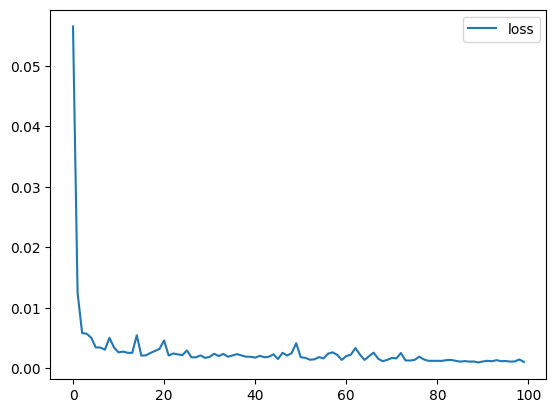

In [39]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediction for testing: Using TimeSeriesGenerator

In [40]:
batch_size1 = 1

In [41]:
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### Predict Future Data Points for Testing

In [42]:
normalized_prediction = model.predict(test_tsGenerator60)

138/138 [==============================] - 2s 10ms/step


In [43]:
normalized_prediction

array([[0.65064436],
       [0.64290786],
       [0.6343092 ],
       [0.62656355],
       [0.6185852 ],
       [0.61028296],
       [0.6027983 ],
       [0.59496737],
       [0.58586514],
       [0.5741341 ],
       [0.55916405],
       [0.5461986 ],
       [0.5357925 ],
       [0.52834725],
       [0.52431846],
       [0.5233023 ],
       [0.51963985],
       [0.5145345 ],
       [0.5084745 ],
       [0.50297636],
       [0.4993573 ],
       [0.497919  ],
       [0.4979091 ],
       [0.49810413],
       [0.49898636],
       [0.50095206],
       [0.5040279 ],
       [0.50809914],
       [0.511592  ],
       [0.51422   ],
       [0.51551193],
       [0.5171286 ],
       [0.51886016],
       [0.520121  ],
       [0.5240923 ],
       [0.5311411 ],
       [0.54044706],
       [0.55226743],
       [0.5662211 ],
       [0.5810812 ],
       [0.5942751 ],
       [0.60448253],
       [0.6110604 ],
       [0.61487025],
       [0.61634725],
       [0.6163786 ],
       [0.6154739 ],
       [0.614

In [44]:
len(normalized_prediction)

138

In [45]:
prediction = scaler.inverse_transform(normalized_prediction)

In [46]:
prediction_index = np.arange(1244, 1382, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index,columns=['Prediction'])

In [47]:
df_prediction

,Prediction
1244,43.984509
1245,43.673744
1246,43.328354
1247,43.017223
1248,42.696751
...,...
1377,48.488159
1378,48.633984
1379,48.687874
1380,48.730850


### Visualize Prediction

<AxesSubplot:>

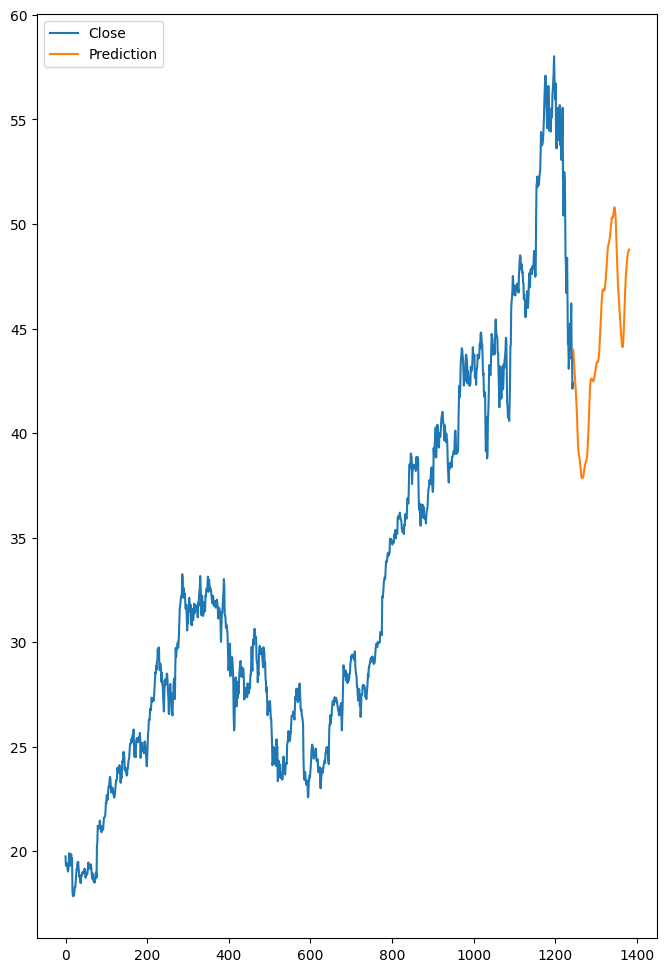

In [48]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### visualize prediction and compare actual close price

<AxesSubplot:>

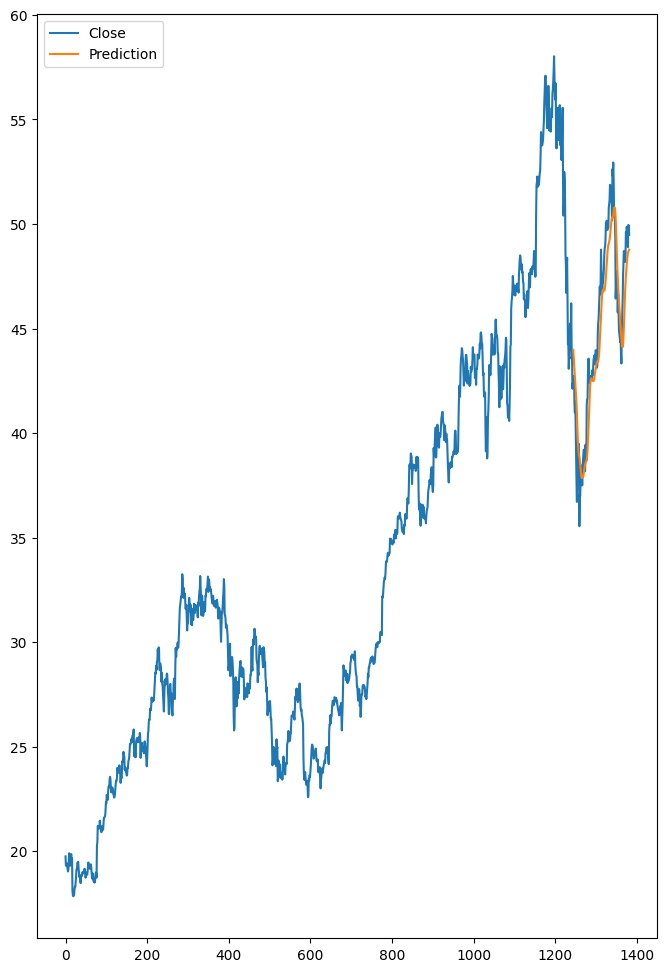

In [49]:
ax=df.plot()
df_prediction.plot(ax=ax, figsize=(8,12))

### Time series data Forecasting with LSTM

In [50]:
full_scaler=MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

In [51]:
length60

60

In [52]:
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)

### Build, Compile, and Fit LSTM Model for Forecasting

In [53]:
model.fit_generator(forecast_tsGenerator, epochs=100)

Epoch 1/100
 1/42 [..............................] - ETA: 3s - loss: 0.0012

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


42/42 [==============================] - 3s 74ms/step - loss: 0.0017
Epoch 2/100
42/42 [==============================] - 3s 73ms/step - loss: 0.0016
Epoch 3/100
42/42 [==============================] - 3s 72ms/step - loss: 0.0012
Epoch 4/100
42/42 [==============================] - 3s 71ms/step - loss: 0.0013
Epoch 5/100
42/42 [==============================] - 3s 71ms/step - loss: 0.0011
Epoch 6/100
42/42 [==============================] - 3s 75ms/step - loss: 0.0012
Epoch 7/100
42/42 [==============================] - 3s 71ms/step - loss: 9.7738e-04
Epoch 8/100
42/42 [==============================] - 3s 69ms/step - loss: 0.0010
Epoch 9/100
42/42 [==============================] - 3s 69ms/step - loss: 0.0013
Epoch 10/100
42/42 [==============================] - 3s 70ms/step - loss: 0.0016
Epoch 11/100
42/42 [==============================] - 3s 69ms/step - loss: 0.0011
Epoch 12/100
42/42 [==============================] - 3s 69ms/step - loss: 0.0010
Epoch 13/100
42/42 [=============

In [54]:
forecast = []
periods = 107
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1,length60,n_features))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [55]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[50.54019022],
       [50.80206916],
       [51.15319716],
       [51.5255259 ],
       [51.88727702],
       [52.22792554],
       [52.54736614],
       [52.84924758],
       [53.13710133],
       [53.41313485],
       [53.67831063],
       [53.93284413],
       [54.17666352],
       [54.40970897],
       [54.63201637],
       [54.84374614],
       [55.04515685],
       [55.23652385],
       [55.41817992],
       [55.59045547],
       [55.75368089],
       [55.90818659],
       [56.05431495],
       [56.19240114],
       [56.32277558],
       [56.44577345],
       [56.56172276],
       [56.67094672],
       [56.77375899],
       [56.87047798],
       [56.96140777],
       [57.04683805],
       [57.12705374],
       [57.20233257],
       [57.27294028],
       [57.33913307],
       [57.40115993],
       [57.45925549],
       [57.51364002],
       [57.56453379],
       [57.61215707],
       [57.65668942],
       [57.69832716],
       [57.7372379 ],
       [57.77359641],
       [57

In [56]:
df

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001


In [57]:
forecast_index=np.arange(1382,1489,step=1)


In [58]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [59]:
forecast_df

,Forecast
1382,50.540190
1383,50.802069
1384,51.153197
1385,51.525526
1386,51.887277
...,...
1484,58.266031
1485,58.266567
1486,58.267075
1487,58.267539


<AxesSubplot:>

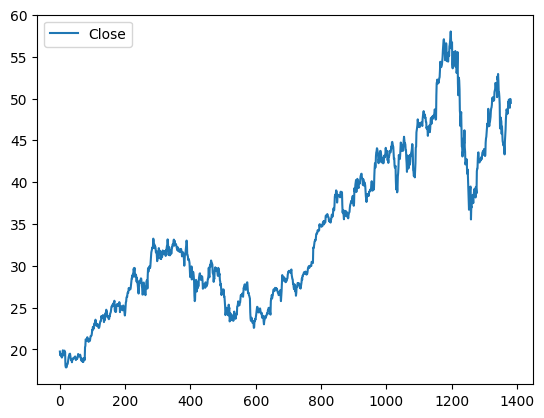

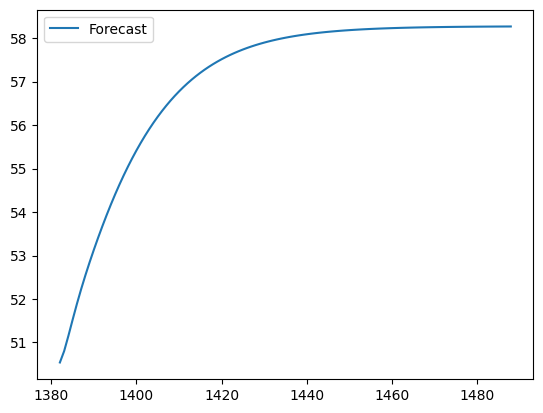

In [60]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

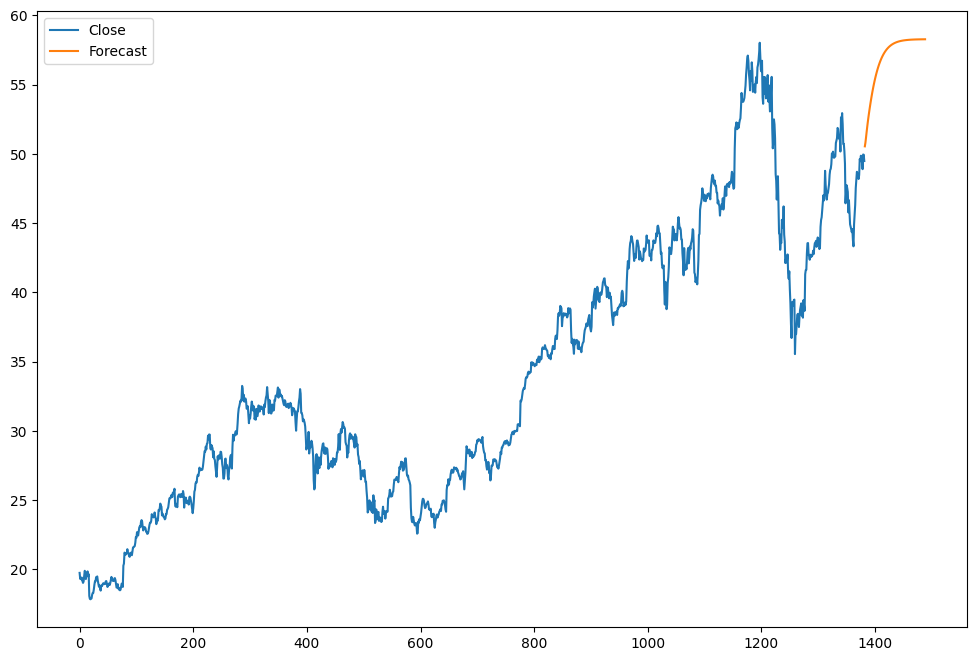

In [61]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [72]:
dir_path_dataset_2 = 'DATA/APPL_stock_20190701_20191215.csv'

In [73]:
df_ALL_JUL_DEC_2019 = pd.read_csv(dir_path_dataset_2)


In [74]:
df_ALL_JUL_DEC_2019

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/1/2019,50.792500,51.122501,50.162498,50.387501,48.756935,109012000
1,7/2/2019,50.352501,50.782501,50.340000,50.682499,49.042381,67740800
2,7/3/2019,50.820000,51.110001,50.672501,51.102501,49.448792,45448000
3,7/5/2019,50.837502,51.270000,50.724998,51.057499,49.405251,69062000
4,7/8/2019,50.202499,50.349998,49.602501,50.005001,48.386806,101354400
...,...,...,...,...,...,...,...
102,11/22/2019,65.647499,65.794998,65.209999,65.445000,63.758602,65325200
103,11/25/2019,65.677498,66.610001,65.629997,66.592499,64.876541,84020400
104,11/26/2019,66.735001,66.790001,65.625000,66.072502,64.369965,105207600
105,11/27/2019,66.394997,66.995003,66.327499,66.959999,65.234566,65235600


In [75]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [76]:
df_JUL_DEC_2019

,Close
0,50.387501
1,50.682499
2,51.102501
3,51.057499
4,50.005001
...,...
102,65.445000
103,66.592499
104,66.072502
105,66.959999


<AxesSubplot:>

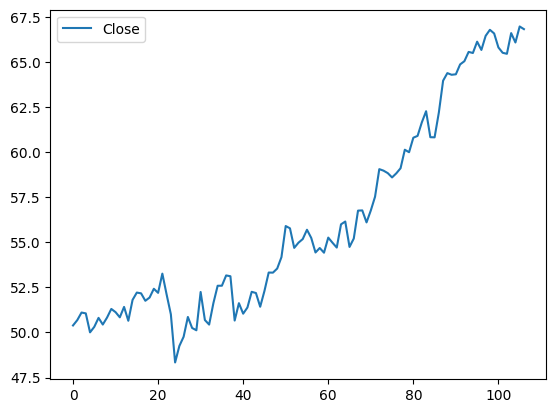

In [77]:
df_JUL_DEC_2019.plot()

In [78]:
forecast_df['Forecast'].values

array([50.54019022, 50.80206916, 51.15319716, 51.5255259 , 51.88727702,
       52.22792554, 52.54736614, 52.84924758, 53.13710133, 53.41313485,
       53.67831063, 53.93284413, 54.17666352, 54.40970897, 54.63201637,
       54.84374614, 55.04515685, 55.23652385, 55.41817992, 55.59045547,
       55.75368089, 55.90818659, 56.05431495, 56.19240114, 56.32277558,
       56.44577345, 56.56172276, 56.67094672, 56.77375899, 56.87047798,
       56.96140777, 57.04683805, 57.12705374, 57.20233257, 57.27294028,
       57.33913307, 57.40115993, 57.45925549, 57.51364002, 57.56453379,
       57.61215707, 57.65668942, 57.69832716, 57.7372379 , 57.77359641,
       57.80755592, 57.83926247, 57.86886691, 57.89649372, 57.92227939,
       57.94633643, 57.96877739, 57.9897028 , 58.00921803, 58.02741404,
       58.04437464, 58.06017644, 58.07491042, 58.08862926, 58.10141914,
       58.11332795, 58.12442752, 58.13476573, 58.14439525, 58.15335439,
       58.16170541, 58.16947702, 58.17671712, 58.18345443, 58.18

In [79]:
df_JUL_DEC_2019['Forecast']=forecast_df['Forecast'].values

In [82]:
df_JUL_DEC_2019

,Close,Forecast
0,50.387501,50.540190
1,50.682499,50.802069
2,51.102501,51.153197
3,51.057499,51.525526
4,50.005001,51.887277
...,...,...
102,65.445000,58.266031
103,66.592499,58.266567
104,66.072502,58.267075
105,66.959999,58.267539


<AxesSubplot:>

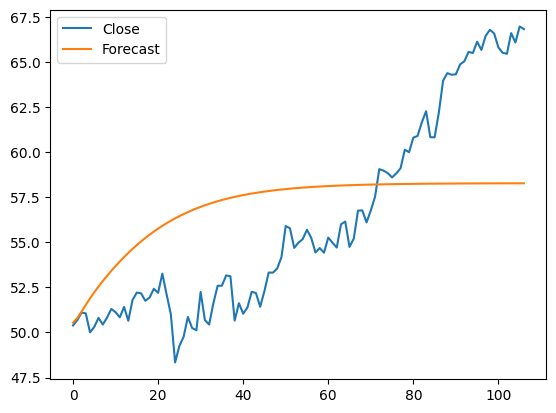

In [83]:
df_JUL_DEC_2019.plot()